In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [72]:
Diabetes = pd.read_csv("diabetes.csv")

In [73]:
D = Diabetes[(Diabetes['Outcome'] != 0)]
H = Diabetes[(Diabetes['Outcome'] == 0)]

In [74]:
Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## Data Cleaning

In [75]:
def mean_target(var):   
    temp = Diabetes[Diabetes[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp

In [76]:
def Distribusi(data_select, size_bin) :  
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Diabetes', 'Sehat']
    colors = ['#0000ff', '#ff0000']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [77]:
mean_target('Insulin')

,Outcome,Insulin
0,0,130.287879
1,1,206.846154


In [78]:
Diabetes.loc[(Diabetes['Outcome'] == 0 ) & (Diabetes['Insulin'].isnull()), 'Insulin'] = 68.792000
Diabetes.loc[(Diabetes['Outcome'] == 1 ) & (Diabetes['Insulin'].isnull()), 'Insulin'] = 100.335821

In [79]:
mean_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.235457
1,1,33.000000


In [80]:
Diabetes.loc[(Diabetes['Outcome'] == 0 ) & (Diabetes['SkinThickness'].isnull()), 'SkinThickness'] = 19.664000
Diabetes.loc[(Diabetes['Outcome'] == 1 ) & (Diabetes['SkinThickness'].isnull()), 'SkinThickness'] = 22.164179

In [81]:
mean_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.877339
1,1,75.321429


In [82]:
Diabetes.loc[(Diabetes['Outcome'] == 0 ) & (Diabetes['BloodPressure'].isnull()), 'BloodPressure'] = 68.184000
Diabetes.loc[(Diabetes['Outcome'] == 1 ) & (Diabetes['BloodPressure'].isnull()), 'BloodPressure'] = 70.824627

In [83]:
mean_target('Glucose')

,Outcome,Glucose
0,0,110.643863
1,1,142.319549


In [84]:
Diabetes.loc[(Diabetes['Outcome'] == 0 ) & (Diabetes['Glucose'].isnull()), 'Glucose'] = 109.980000
Diabetes.loc[(Diabetes['Outcome'] == 1 ) & (Diabetes['Glucose'].isnull()), 'Glucose'] = 141.257463

In [85]:
mean_target('BMI')

,Outcome,BMI
0,0,30.859674
1,1,35.406767


In [86]:
Diabetes.loc[(Diabetes['Outcome'] == 0 ) & (Diabetes['BMI'].isnull()), 'BMI'] = 30.304200
Diabetes.loc[(Diabetes['Outcome'] == 1 ) & (Diabetes['BMI'].isnull()), 'BMI'] = 35.142537

In [87]:
x = Diabetes.drop(["Outcome"], axis = 1)
y = Diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [88]:
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [89]:
prediksi = classifier.predict(x_test)
confusion_matrix(y_test,prediksi)
pd.crosstab(y_test, prediksi, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,11,147
1,25,59,84
All,161,70,231


In [90]:
classifier = KNeighborsClassifier(n_neighbors=1) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       147
           1       0.64      0.57      0.60        84

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.72       231



Text(0.5, 15.0, 'Prediksi')

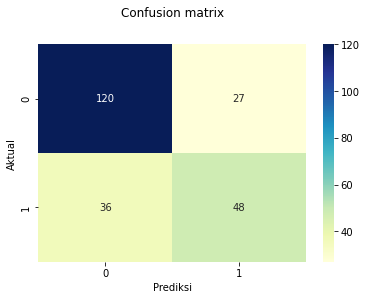

In [91]:
cnf_matrix = metrics.confusion_matrix(y_test, prediksi)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Aktual')
plt.xlabel('Prediksi')

In [92]:
classifier = KNeighborsClassifier(n_neighbors=2) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.72      0.93      0.82       147
           1       0.76      0.38      0.51        84

    accuracy                           0.73       231
   macro avg       0.74      0.66      0.66       231
weighted avg       0.74      0.73      0.70       231



In [93]:
classifier = KNeighborsClassifier(n_neighbors=3) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       147
           1       0.74      0.61      0.67        84

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [94]:
classifier = KNeighborsClassifier(n_neighbors=4) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       147
           1       0.79      0.44      0.56        84

    accuracy                           0.75       231
   macro avg       0.77      0.69      0.70       231
weighted avg       0.76      0.75      0.73       231



In [95]:
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       147
           1       0.78      0.62      0.69        84

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [96]:
classifier = KNeighborsClassifier(n_neighbors=6) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       147
           1       0.80      0.49      0.61        84

    accuracy                           0.77       231
   macro avg       0.78      0.71      0.72       231
weighted avg       0.78      0.77      0.75       231



In [97]:
classifier = KNeighborsClassifier(n_neighbors=7) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       147
           1       0.75      0.61      0.67        84

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



In [98]:
classifier = KNeighborsClassifier(n_neighbors=8) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       147
           1       0.80      0.48      0.60        84

    accuracy                           0.77       231
   macro avg       0.78      0.70      0.72       231
weighted avg       0.77      0.77      0.75       231



In [99]:
classifier = KNeighborsClassifier(n_neighbors=9) 
classifier.fit(x_train, y_train)
prediksi = classifier.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.76      0.57      0.65        84

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231



In [100]:
nbModel = GaussianNB()

In [101]:
nbModel.fit(x_train, y_train)
nb_y_pred = nbModel.predict(x_test)

In [102]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       147
           1       0.76      0.64      0.70        84

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



Text(0.5, 15.0, 'Prediksi')

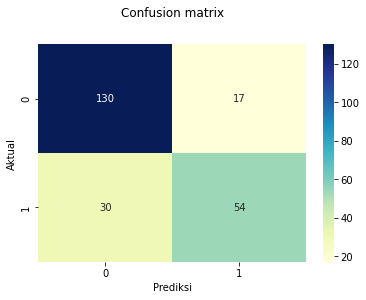

In [103]:
cnf_matrix = metrics.confusion_matrix(y_test, nb_y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Aktual')
plt.xlabel('Prediksi')